In [2]:
import pandas as pd
import numpy as np
import io
import requests
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.dates import DateFormatter, MinuteLocator
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as tck
from datetime import datetime
from dateutil.parser import parse

# Set date for future references
today = dt.datetime.today()
filedate = today.strftime("%Y-%m-%d")

# Create URL to Excel file (alternatively this can be a filepath)
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-' + filedate + '.xlsx'

# Load the first sheet of the Excel file into a data frame
df = pd.read_excel(url, sheet_name=0, header=0)
# Drop extra columns
df.drop(columns=['day','month','year','geoId','countryterritoryCode','popData2018'], inplace=True)
# Rename columns
df.columns = ['date', 'new_cases', 'new_deaths', 'location']

# set yesterday's date for graphic
d = dt.datetime.today() - dt.timedelta(days=1)

#sort dataframe by Country then by Date
df.sort_values(by=['location','date'],ascending=True,inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)

df.head(5)

,date,new_cases,new_deaths,location
0,2019-12-31,0,0,Afghanistan
1,2020-01-01,0,0,Afghanistan
2,2020-01-02,0,0,Afghanistan
3,2020-01-03,0,0,Afghanistan
4,2020-01-04,0,0,Afghanistan


In [2]:
# future additions
# dictionary of locations and their populations
# quadrant figure with raw graphs and population normalized graphs

In [2]:
# dictionary of locations and their populations
poplocDict = {
    "Afghanistan" : 1000000
}
# example 1
for loc in poplocDist:
    print(loc) #print keys
    print(poplocDist[loc]) #print values
# example 2
for loc in poplocDist.value:
    print(loc) #print values
# example 3
for loc, pop in poplocDist.value:
    print(loc, pop) #print keys and values
# example 4
if "Afghanistan" in poplocDist:
    print("Yes, 'Afghanistan' is one of the keys in the dictionary")
# example 5
print(len(poplocDist))

In [2]:
df.head(103)

,date,new_cases,new_deaths,location
0,2019-12-31,0,0,Afghanistan
1,2020-01-01,0,0,Afghanistan
2,2020-01-02,0,0,Afghanistan
3,2020-01-03,0,0,Afghanistan
4,2020-01-04,0,0,Afghanistan
...,...,...,...,...
98,2020-03-26,23,0,Albania
99,2020-03-27,28,1,Albania
100,2020-03-28,12,3,Albania
101,2020-03-29,11,1,Albania


In [3]:
# Population normalization, per 1,000
locations = df.location.unique()
loctot = locations.size
locnum = 0
curloc = locations[0] #'Afghanistan'
ItalyPopT = 60484
SpainPopT = 46750
FrancePopT = 65236
GermanyPopT = 83715
USPopT = 330505

# set global variable for threshold value for days since Cases per 1,000 calculation
casesThresh = 0.05
# set global variable for threshold value for days since Deaths per 1,000 calculation
deathThresh = 0.001
# set global variable for case threshold date
c100 = dt.datetime.today()
# set global variable for death threshold date
d100 = dt.datetime.today()

def calcs(pop, tcases, tdeaths):
    """
    Calculates values for normalize population cases and deaths; calculates days since threshold value of population normalized cases and deaths
    Parameters:
        pop (int) : population of selected country (in thousands)
        tcases (int) : total cases for selected country
        tdeaths (int) : total deaths selected country (in thousands)
    """
    global cmarker
    global dmarker
    global c100
    global d100
    cases_norm = tcases / pop
    deaths_norm = tdeaths / pop
    df.loc[index,'cases_norm'] = cases_norm
    df.loc[index,'deaths_norm'] = deaths_norm
    if cases_norm < casesThresh:
        df.loc[index,'dnorm_case'] = 0
    elif cases_norm >= casesThresh:
        if cmarker == 0:
            cmarker = 1
            df.loc[index,'dnorm_case'] = 0
            c100 = row['date']
        else:
            timedelta = row['date'] - c100
            timedeltaint = timedelta.days
            df.loc[index,'dnorm_case'] = int(timedeltaint)
    if deaths_norm < deathThresh:
        df.loc[index,'dnorm_death'] = 0
    elif deaths_norm >= deathThresh:
        if dmarker == 0:
            dmarker = 1
            df.loc[index,'dnorm_death'] = 0
            d100 = row['date']
        else:
            timedelta = row['date'] - d100
            timedeltaint = timedelta.days
            df.loc[index,'dnorm_death'] = int(timedeltaint)

# loop through each country in df
for locs in locations:
    locnum += 1
    print('Processing: ' + locs + ', Country ' + str(locnum) + ' of ' + str(loctot))
    marker = 0
    cmarker = 0
    dmarker = 0
    tcases = 0
    tdeaths = 0
    #loop through each row in df
    for index, row in df.iterrows():
        if row['location'] == locs:
            tcases = int(row['new_cases'] + tcases)
            tdeaths = int(row['new_deaths'] + tdeaths)
            df.loc[index,'total_cases'] = tcases
            df.loc[index,'total_deaths'] = tdeaths
            if row['location'] == "Italy":
                pop = ItalyPopT
                calcs(pop, tcases, tdeaths)
            elif row['location'] == "Spain":
                pop = SpainPopT
                calcs(pop, tcases, tdeaths)
            elif row['location'] == "France":
                pop = FrancePopT
                calcs(pop, tcases, tdeaths)
            elif row['location'] == "Germany":
                pop = GermanyPopT
                calcs(pop, tcases, tdeaths)
            elif row['location'] == "United_States_of_America":
                pop = USPopT
                calcs(pop, tcases, tdeaths)

# DataFrame from Group By code and graphs with date index
dfd = df.set_index(['date'])
dfloc = dfd.groupby('location')
#df100.head()

Processing: Afghanistan, Country 1 of 196
Processing: Albania, Country 2 of 196
Processing: Algeria, Country 3 of 196
Processing: Andorra, Country 4 of 196
Processing: Angola, Country 5 of 196
Processing: Anguilla, Country 6 of 196
Processing: Antigua_and_Barbuda, Country 7 of 196
Processing: Argentina, Country 8 of 196
Processing: Armenia, Country 9 of 196
Processing: Aruba, Country 10 of 196
Processing: Australia, Country 11 of 196
Processing: Austria, Country 12 of 196
Processing: Azerbaijan, Country 13 of 196
Processing: Bahamas, Country 14 of 196
Processing: Bahrain, Country 15 of 196
Processing: Bangladesh, Country 16 of 196
Processing: Barbados, Country 17 of 196
Processing: Belarus, Country 18 of 196
Processing: Belgium, Country 19 of 196
Processing: Belize, Country 20 of 196
Processing: Benin, Country 21 of 196
Processing: Bermuda, Country 22 of 196
Processing: Bhutan, Country 23 of 196
Processing: Bolivia, Country 24 of 196
Processing: Bosnia_and_Herzegovina, Country 25 of 19

In [4]:
#df.head()
#df.to_csv (r'C:\Users\Ckudym\data\coronavirus\func_calcs30.csv', index = False, header=True)
df.describe()

,new_cases,new_deaths,total_cases,total_deaths,cases_norm,deaths_norm,dnorm_case,dnorm_death
count,7710.000000,7710.000000,7710.000000,7710.000000,455.000000,455.000000,455.000000,455.000000
mean,92.822309,4.355253,1164.028016,45.961997,0.088571,0.005727,1.679121,1.586813
std,694.614266,40.370608,7937.076691,401.018230,0.256500,0.022340,4.408430,4.453460
min,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000092,0.000000,0.000000,0.000000
75%,6.000000,0.000000,50.000000,0.000000,0.010432,0.000107,0.000000,0.000000
max,19979.000000,971.000000,143025.000000,10781.000000,1.685497,0.178245,25.000000,26.000000


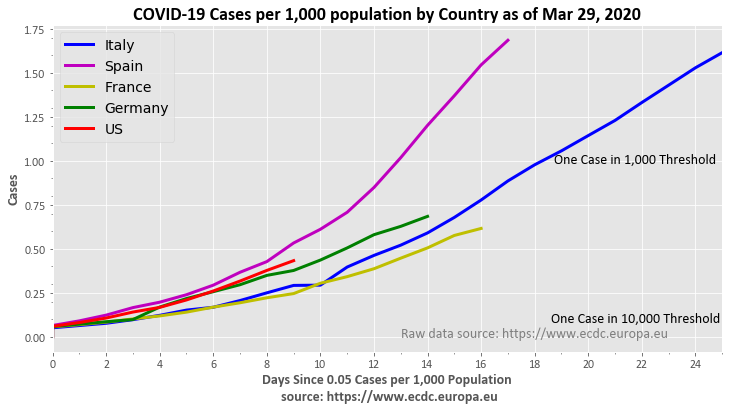

In [5]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
df100g = df.groupby('location')
ax.plot(df100g.get_group('Italy')['dnorm_case'], df100g.get_group('Italy')['cases_norm'], 'b', label='Italy', linewidth=3)
ax.plot(df100g.get_group('Spain')['dnorm_case'], df100g.get_group('Spain')['cases_norm'], 'm', label='Spain', linewidth=3)
ax.plot(df100g.get_group('France')['dnorm_case'], df100g.get_group('France')['cases_norm'], 'y', label='France', linewidth=3)
ax.plot(df100g.get_group('Germany')['dnorm_case'], df100g.get_group('Germany')['cases_norm'], 'g',label='Germany', linewidth=3)
ax.plot(df100g.get_group('United_States_of_America')['dnorm_case'], df100g.get_group('United_States_of_America')['cases_norm'], 'r', label='US', linewidth=3)
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
#log sclae for y values
#plt.yscale("log")

# Initialize minor ticks for both axes
ax.minorticks_on()
# Turn off x-axis minor ticks
#ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0,25)
style = dict(size=14, color='gray', fontname="Calibri")
ax.text(18, -0.005, "Raw data source: https://www.ecdc.europa.eu", ha='center', **style)
style2 = dict(size=14, color='black', fontname="Calibri")
ax.text(21.75, 0.985, "One Case in 1,000 Threshold", ha='center', **style2)
ax.text(21.75, 0.085, "One Case in 10,000 Threshold", ha='center', **style2)
ax.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Deaths by Country as of Mar 24, 2020', fontsize=20, fontweight="bold", fontname="Calibri")
plt.title('COVID-19 Cases per 1,000 population by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Days Since 0.05 Cases per 1,000 Population\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.savefig('COVID-2020-03-30_100d_casenorm_ecdc-func.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

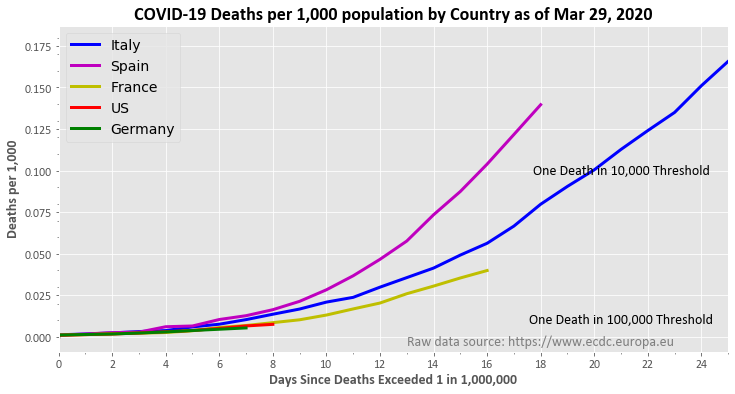

In [6]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
df100g = df.groupby('location')
ax.plot(df100g.get_group('Italy')['dnorm_death'], df100g.get_group('Italy')['deaths_norm'], 'b', label='Italy', linewidth=3)
ax.plot(df100g.get_group('Spain')['dnorm_death'], df100g.get_group('Spain')['deaths_norm'], 'm', label='Spain', linewidth=3)
ax.plot(df100g.get_group('France')['dnorm_death'], df100g.get_group('France')['deaths_norm'], 'y', label='France', linewidth=3)
ax.plot(df100g.get_group('United_States_of_America')['dnorm_death'], df100g.get_group('United_States_of_America')['deaths_norm'], 'r', label='US', linewidth=3)
ax.plot(df100g.get_group('Germany')['dnorm_death'], df100g.get_group('Germany')['deaths_norm'], 'g',label='Germany', linewidth=3)
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
# Initialize minor ticks for both axes
ax.minorticks_on()
# Turn off x-axis minor ticks
#ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0,25)
#log sclae for y values
#plt.yscale("log")
ax.legend(loc='best', fontsize=14)

# Add annotation to the ax
style = dict(size=14, color='gray', fontname="Calibri")
ax.text(18, -0.005, "Raw data source: https://www.ecdc.europa.eu", ha='center', **style)
style2 = dict(size=14, color='black', fontname="Calibri")
ax.text(21, 0.098, "One Death in 10,000 Threshold", ha='center', **style2)
ax.text(21, 0.008, "One Death in 100,000 Threshold", ha='center', **style2)
#plt.title('COVID-19 Total Deaths by Country as of Mar 24, 2020', fontsize=20, fontweight="bold", fontname="Calibri")
plt.title('COVID-19 Deaths per 1,000 population by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Deaths per 1,000', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Days Since Deaths Exceeded 1 in 1,000,000', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.savefig('COVID-2020-03-30_100d_deathnorm_ecdc_func.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

In [7]:
# DataFrame from Group By code and graphs with date index
dfd = df.set_index(['date'])
dfloc = dfd.groupby('location')
dfloc.describe()

new_cases                                                     \
                count       mean        std  min  25%   50%   75%    max   
location                                                                   
Afghanistan      81.0   1.407407   4.620005  0.0  0.0   0.0   0.0   33.0   
Albania          22.0   9.636364   7.467679  0.0  4.0   9.5  12.0   28.0   
Algeria          86.0   5.279070  16.628573  0.0  0.0   0.0   0.0  104.0   
Andorra          17.0  19.647059  15.345770  0.0  3.0  22.0  31.0   43.0   
Angola            9.0   0.777778   1.092906  0.0  0.0   0.0   1.0    3.0   
...               ...        ...        ...  ...  ...   ...   ...    ...   
Uzbekistan       15.0   9.666667   8.085849  0.0  4.5   8.0  12.5   29.0   
Venezuela        16.0   7.437500  12.371843  0.0  0.0   2.0  10.5   48.0   
Vietnam          87.0   2.620690   6.953736  0.0  0.0   0.0   2.0   54.0   
Zambia           12.0   2.416667   3.918681  0.0  0.0   1.0   2.0   12.0   
Zimbabwe         10.0   0.700000   0.823273  0.0  0.0   0.5   1.0    2.0   

            new_deaths            ... dnorm_case     dnorm_death               \
                 count      mean  ...        75% max       count mean std min   
location                          ...                                           
Afghanistan       81.0  0.049383  ...        NaN NaN         0.0  NaN NaN NaN   
Albania           22.0  0.454545  ...        NaN NaN         0.0  NaN NaN NaN   
Algeria           86.0  0.337209  ...        NaN NaN         0.0  NaN NaN NaN   
Andorra           17.0  0.352941  ...        NaN NaN         0.0  NaN NaN NaN   
Angola             9.0  0.222222  ...        NaN NaN         0.0  NaN NaN NaN   
...                ...       ...  ...        ...  ..         ...  ...  ..  ..   
Uzbekistan        15.0  0.066667  ...        NaN NaN         0.0  NaN NaN NaN   
Venezuela         16.0  0.062500  ...        NaN NaN         0.0  NaN NaN NaN   
Vietnam           87.0  0.000000  ...        NaN NaN         0.0  NaN NaN NaN   
Zambia            12.0  0.000000  ...        NaN NaN         0.0  NaN NaN NaN   
Zimbabwe          10.0  0.100000  ...        NaN NaN         0.0  NaN NaN NaN   

                             
            25% 50% 75% max  
location                     
Afghanistan NaN NaN NaN NaN  
Albania     NaN NaN NaN NaN  
Algeria     NaN NaN NaN NaN  
Andorra     NaN NaN NaN NaN  
Angola      NaN NaN NaN NaN  
...          ..  ..  ..  ..  
Uzbekistan  NaN NaN NaN NaN  
Venezuela   NaN NaN NaN NaN  
Vietnam     NaN NaN NaN NaN  
Zambia      NaN NaN NaN NaN  
Zimbabwe    NaN NaN NaN NaN  

[196 rows x 64 columns]

Text(0.5, 0, 'Date')

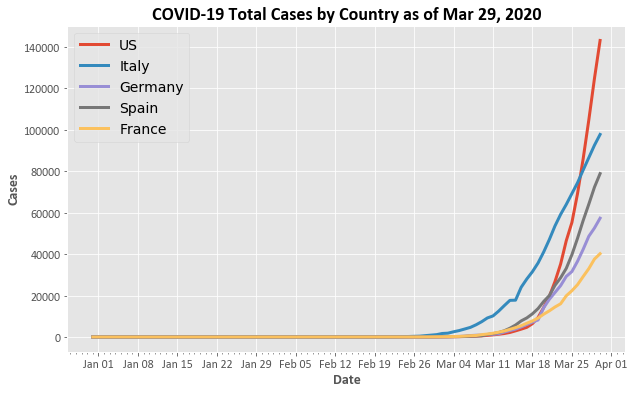

In [8]:
plt.style.use('ggplot')
#dfloc = df.groupby('location')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.plot(dfloc.get_group('United_States_of_America')['total_cases'], label='US', linewidth=3)
#plt.plot(dfloc.get_group('China')['total_cases'], label='China', linewidth=3)
#plt.plot(dfloc.get_group('South_Korea')['total_cases'], label='South Korea', linewidth=3)
plt.plot(dfloc.get_group('Italy')['total_cases'], label='Italy', linewidth=3)
plt.plot(dfloc.get_group('Germany')['total_cases'], label='Germany', linewidth=3)
plt.plot(dfloc.get_group('Spain')['total_cases'], label='Spain', linewidth=3)
plt.plot(dfloc.get_group('France')['total_cases'], label='France', linewidth=3)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
plt.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
plt.title('COVID-19 Total Cases by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")

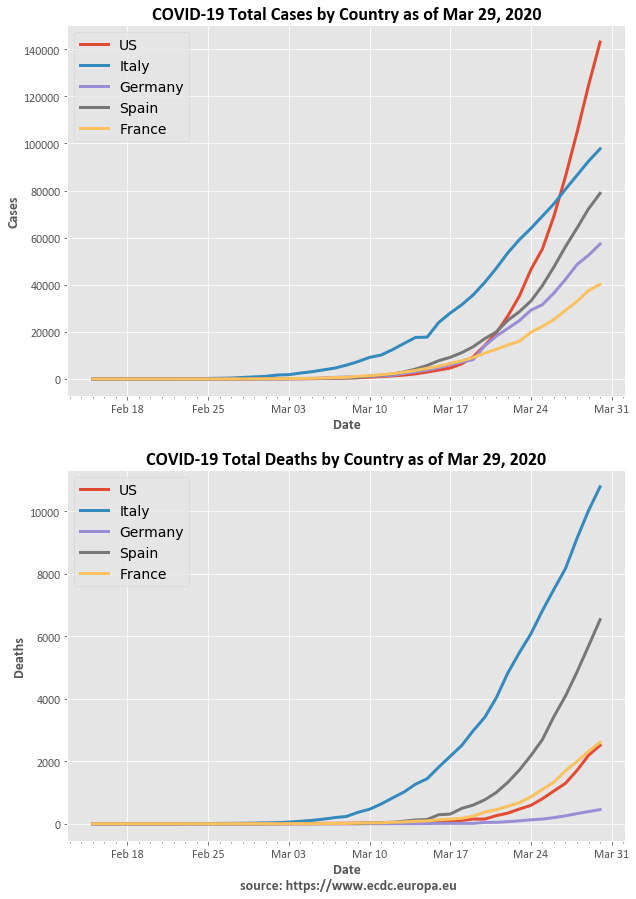

In [9]:
# Double figure for World Cases and World Deaths

plt.style.use('ggplot')
fig3, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United_States_of_America')["2020-02-15":].total_cases, label='US', linewidth=3)
#ax1.plot(dfloc.get_group('China')["2020-02-15":].total_cases, label='China', linewidth=3)
#ax1.plot(dfloc.get_group('South_Korea')["2020-02-15":].total_cases, label='South Korea', linewidth=3)
ax1.plot(dfloc.get_group('Italy')["2020-02-15":].total_cases, label='Italy', linewidth=3)
ax1.plot(dfloc.get_group('Germany')["2020-02-15":].total_cases, label='Germany', linewidth=3)
ax1.plot(dfloc.get_group('Spain')["2020-02-15":].total_cases, label='Spain', linewidth=3)
ax1.plot(dfloc.get_group('France')["2020-02-15":].total_cases, label='France', linewidth=3)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax1.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
ax1.legend(loc='best', fontsize=14)
#ax1.set_title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_title('COVID-19 Total Cases by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax1.set_xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United_States_of_America')["2020-02-15":].total_deaths, label='US', linewidth=3)
#ax2.plot(dfloc.get_group('China')["2020-02-15":].total_deaths, label='China', linewidth=3)
#ax2.plot(dfloc.get_group('South_Korea')["2020-02-15":].total_deaths, label='South Korea', linewidth=3)
ax2.plot(dfloc.get_group('Italy')["2020-02-15":].total_deaths, label='Italy', linewidth=3)
ax2.plot(dfloc.get_group('Germany')["2020-02-15":].total_deaths, label='Germany', linewidth=3)
ax2.plot(dfloc.get_group('Spain')["2020-02-15":].total_deaths, label='Spain', linewidth=3)
ax2.plot(dfloc.get_group('France')["2020-02-15":].total_deaths, label='France', linewidth=3)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax2.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
ax2.legend(loc='best', fontsize=14)
#ax2.set_title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
ax2.set_title('COVID-19 Total Deaths by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
#ax2.text(1, 1, 'source: https://ourworldindata.org/coronavirus-source-data')
#plt.figtext(5, 0.5, 10, text='test')
#plt.show()
plt.savefig('COVID-2020-03-29_US_ecdc.png', bbox_inches='tight', pad_inches=0.2)

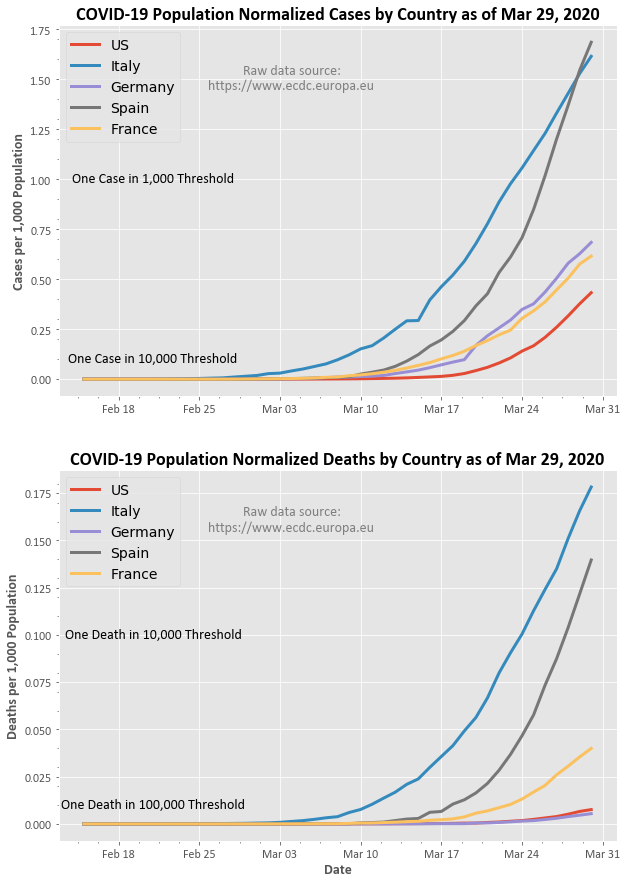

In [10]:
# Double figure for World Cases and World Deaths

plt.style.use('ggplot')
fig3, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United_States_of_America')["2020-02-15":].cases_norm, label='US', linewidth=3)
#ax1.plot(dfloc.get_group('China')["2020-02-15":].cases_norm, label='China', linewidth=3)
#ax1.plot(dfloc.get_group('South_Korea')["2020-02-15":].cases_norm, label='South Korea', linewidth=3)
ax1.plot(dfloc.get_group('Italy')["2020-02-15":].cases_norm, label='Italy', linewidth=3)
ax1.plot(dfloc.get_group('Germany')["2020-02-15":].cases_norm, label='Germany', linewidth=3)
ax1.plot(dfloc.get_group('Spain')["2020-02-15":].cases_norm, label='Spain', linewidth=3)
ax1.plot(dfloc.get_group('France')["2020-02-15":].cases_norm, label='France', linewidth=3)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax1.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
# Initialize minor ticks for both axes
ax1.minorticks_on()
# Turn off x-axis minor ticks
#ax.xaxis.set_tick_params(which='minor', bottom=False)
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.xaxis.set_major_locator(MultipleLocator(2))
#ax1.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
#ax1.set_xlim(0,25)
style = dict(size=14, color='gray', fontname="Calibri")
sourcedate_point = '2020-03-04'
sourcedate_object = datetime.strptime(sourcedate_point, '%Y-%m-%d').date()
ax1.text(sourcedate_object, 1.45, "Raw data source:\nhttps://www.ecdc.europa.eu", ha='center', **style)
style2 = dict(size=14, color='black', fontname="Calibri")
t1date_point = '2020-02-21'
t1date_object = datetime.strptime(t1date_point, '%Y-%m-%d').date()
ax1.text(t1date_object, 0.985, "One Case in 1,000 Threshold", ha='center', **style2)
t2date_point = '2020-02-21'
t2date_object = datetime.strptime(t2date_point, '%Y-%m-%d').date()
ax1.text(t2date_object, 0.085, "One Case in 10,000 Threshold", ha='center', **style2)
ax1.legend(loc='best', fontsize=14)
#ax1.set_title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_title('COVID-19 Population Normalized Cases by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('Cases per 1,000 Population', fontsize=14, fontweight="bold", fontfamily="calibri")
#ax1.set_xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United_States_of_America')["2020-02-15":].deaths_norm, label='US', linewidth=3)
#ax2.plot(dfloc.get_group('China')["2020-02-15":].deaths_norm, label='China', linewidth=3)
#ax2.plot(dfloc.get_group('South_Korea')["2020-02-15":].deaths_norm, label='South Korea', linewidth=3)
ax2.plot(dfloc.get_group('Italy')["2020-02-15":].deaths_norm, label='Italy', linewidth=3)
ax2.plot(dfloc.get_group('Germany')["2020-02-15":].deaths_norm, label='Germany', linewidth=3)
ax2.plot(dfloc.get_group('Spain')["2020-02-15":].deaths_norm, label='Spain', linewidth=3)
ax2.plot(dfloc.get_group('France')["2020-02-15":].deaths_norm, label='France', linewidth=3)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax2.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
# Initialize minor ticks for both axes
ax2.minorticks_on()
ax2.yaxis.set_minor_locator(MultipleLocator(0.01))
style = dict(size=14, color='gray', fontname="Calibri")
sourcedate_point = '2020-03-04'
sourcedate_object = datetime.strptime(sourcedate_point, '%Y-%m-%d').date()
ax2.text(sourcedate_object, 0.155, "Raw data source:\nhttps://www.ecdc.europa.eu", ha='center', **style)
style2 = dict(size=14, color='black', fontname="Calibri")
t1date_point = '2020-02-21'
t1date_object = datetime.strptime(t1date_point, '%Y-%m-%d').date()
ax2.text(t1date_object, 0.0985, "One Death in 10,000 Threshold", ha='center', **style2)
t2date_point = '2020-02-21'
t2date_object = datetime.strptime(t2date_point, '%Y-%m-%d').date()
ax2.text(t2date_object, 0.0085, "One Death in 100,000 Threshold", ha='center', **style2)
ax2.legend(loc='best', fontsize=14)
#ax2.set_title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
ax2.set_title('COVID-19 Population Normalized Deaths by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Deaths per 1,000 Population', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")
#ax2.text(1, 1, 'source: https://ourworldindata.org/coronavirus-source-data')
#plt.figtext(5, 0.5, 10, text='test')
plt.savefig('COVID-2020-03-30_Worst_Normalized.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

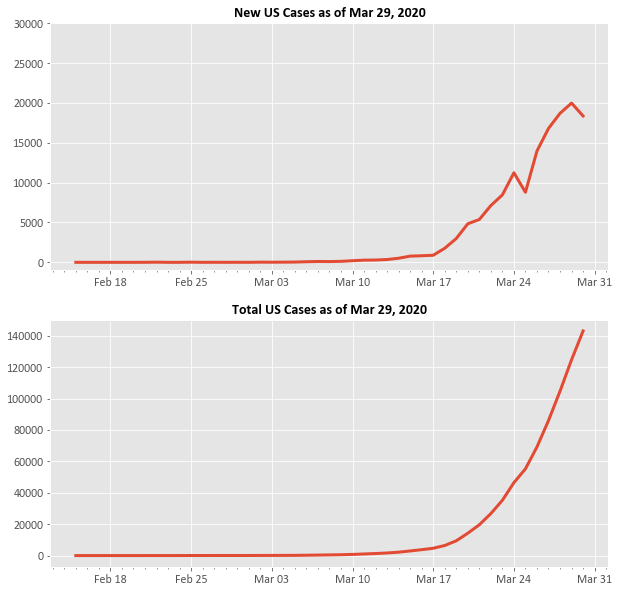

In [11]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

#plot 'new_cases' from United States from Feb 15 - Current Date 
ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United_States_of_America')["2020-02-15":].new_cases, linewidth=3)
ax1.set_ylim((-1000,30000))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax1.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
ax1.set_title('New US Cases as of ' + d.strftime('%b %d, %Y'), fontsize=14, fontweight="bold", fontname="Calibri")

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United_States_of_America')["2020-02-15":].total_cases, linewidth=3)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax2.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
#ax2.set_title('Total US Cases', fontsize=14, fontweight="bold", fontname="Calibri")
ax2.set_title('Total US Cases as of ' + d.strftime('%b %d, %Y'), fontsize=14, fontweight="bold", fontname="Calibri")

plt.show()

In [1]:
# use cartoon style of graphing
#plt.xkcd()
plt.style.use('ggplot')

#create a figure with two rows and two columns of graphs
fig, (axes) = plt.subplots(2, 2, figsize=(20,10))

# Custom x-axis date range for scatter plots
x1date_point = '2020-03-05'
x1date_object = datetime.strptime(sourcedate_point, '%Y-%m-%d').date()
x2date_object = (datetime.today() + dt.timedelta(days=1)).date()

#new graph in position 1 of 4 in 2x2 figure
ax1 = plt.subplot(221)
#plot 'new_cases' from location grouped dataframe
#ax1.plot(dfloc.get_group('United_States_of_America')["2020-03-05":].new_cases, linewidth=3)
ax1.scatter(dfloc.get_group('United_States_of_America')["2020-03-05":].index,dfloc.get_group('United_States_of_America')["2020-03-05":].new_cases, marker='P')
#set y-limit to match scale of total cases
#ax1.set_ylim((-1000,25000))
#set major ticks every x number of days
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set minor ticks at days
ax1.xaxis.set_minor_locator(mdates.DayLocator())
ax1.set_title('New US Cases')
ax1.set_xlim(x1date_object, x2date_object)

ax2 = plt.subplot(223)
ax2.plot(dfloc.get_group('United_States_of_America')["2020-03-05":].total_cases, linewidth=3)
#ax2.scatter(dfloc.get_group('United_States_of_America')["2020-03-05":].index,dfloc.get_group('United_States_of_America')["2020-03-05":].total_cases, marker='o')
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
ax2.set_title('Total US Cases')
ax2.set_xlim(x1date_object, x2date_object)


ax3 = plt.subplot(222)
#ax3.plot(dfloc.get_group('United_States_of_America')["2020-03-05":].new_deaths, linewidth=3)
ax3.scatter(dfloc.get_group('United_States_of_America')["2020-03-05":].index,dfloc.get_group('United_States_of_America')["2020-03-05":].new_deaths, marker='P')
#ax3.set_ylim((-20,2500))
#major ticks once a week
#ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
#major ticks every 4 days
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax3.xaxis.set_minor_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_title('New US Deaths')
ax3.set_xlim(x1date_object, x2date_object)

ax4 = plt.subplot(224)
ax4.plot(dfloc.get_group('United_States_of_America')["2020-03-05":].total_deaths, linewidth=3)
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax4.xaxis.set_minor_locator(mdates.DayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_title('Total US Deaths')
ax4.set_xlim(x1date_object, x2date_object)

plt.show()

NameError: name 'plt' is not defined

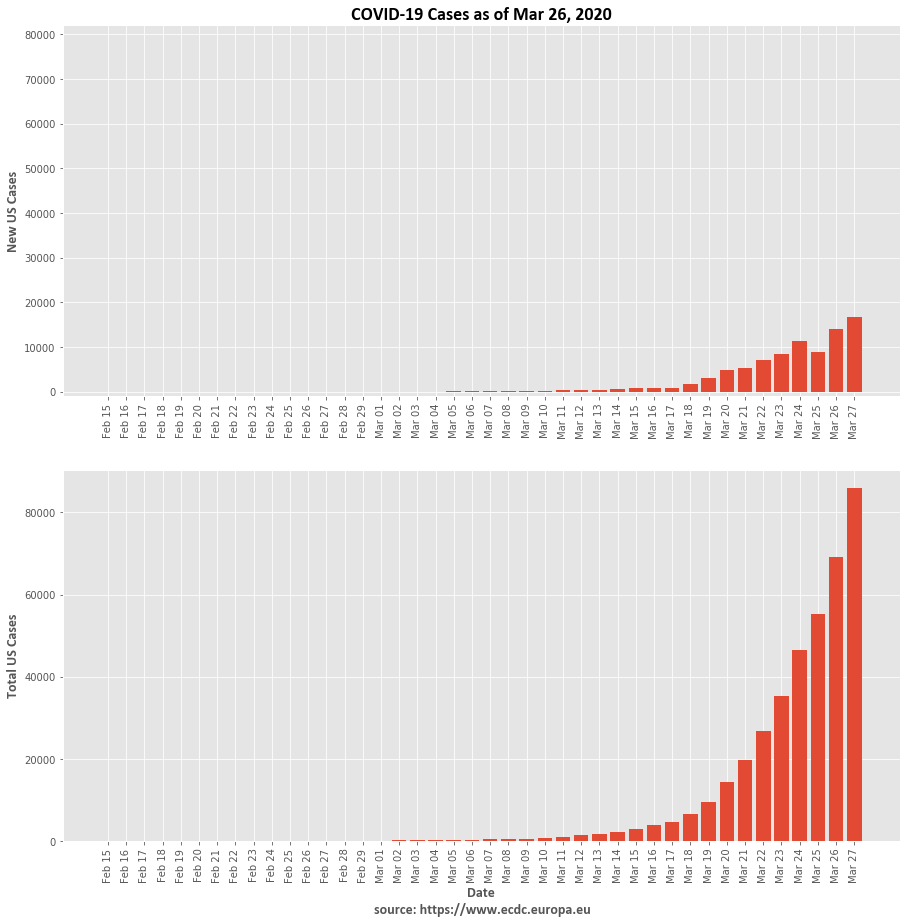

In [73]:
# define figure container (e.g. the canvas) size
fig = plt.figure(figsize=(15,15))

# add subplots to the figure
ax1 = fig.add_subplot(2,1,1) # 2 rows, 1 col, position 1)
ax2 = fig.add_subplot(2,1,2) # 2 rows, 1 col, position 2)

# x-axis is the date, Y axis is the number of cases
ax1.bar(dfloc.get_group('United_States_of_America')["2020-02-15":].index.strftime("%b %d"), dfloc.get_group('United_States_of_America')["2020-02-15":].new_cases)
ax1.set_xticklabels(dfloc.get_group('United_States_of_America')["2020-02-15":].index.strftime("%b %d"), rotation=90)

# x-axis is the date, Y axis is the number of cases
ax2.bar(dfloc.get_group('United_States_of_America')["2020-02-15":].index.strftime("%b %d"), dfloc.get_group('United_States_of_America')["2020-02-15":].total_cases)
ax2.set_xticklabels(dfloc.get_group('United_States_of_America')["2020-02-15":].index.strftime("%b %d"), rotation=90)

# #set y-limit to match scale of total cases
ax1.set_ylim((-1000,82000))

ax1.set_title('COVID-19 Cases as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('New US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Total US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")

plt.show()

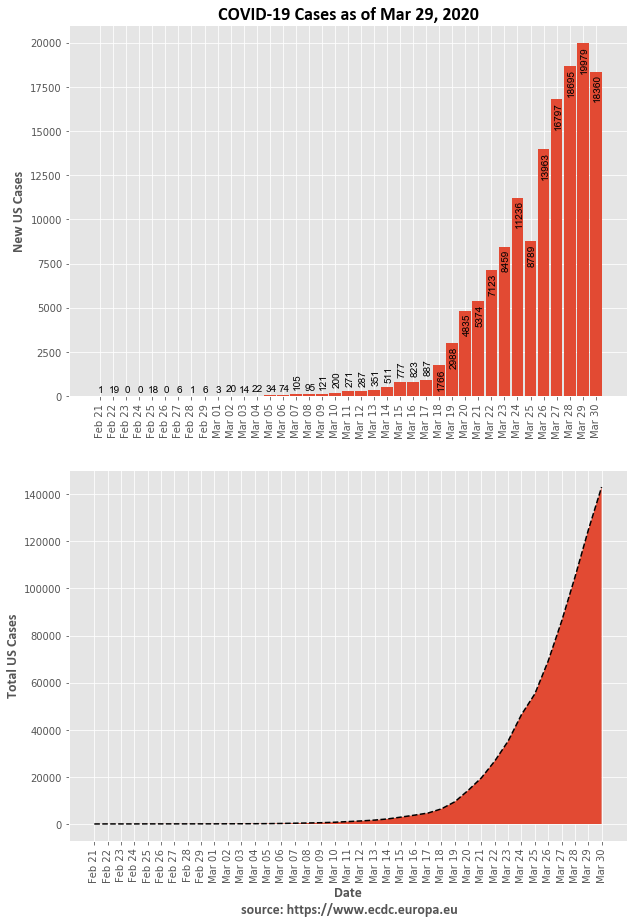

In [37]:
#fig, (axes) = plt.subplots(nrows=2, ncols=1, figsize=(16,20), sharex=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

# function to label bars of bar chart
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height >= 100 and height < 1000:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(2, 5),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial", rotation=90)
        elif height >= 1000 and height < 10000:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(2, -25),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial", rotation=90)
        elif height >= 10000:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(2, -30),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial", rotation=90)
        else:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(1, 2),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial")

# x-axis is the date, Y axis is the number of cases
rects1=ax1.bar(dfloc.get_group('United_States_of_America')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('United_States_of_America')["2020-02-21":].new_cases, width=0.9)
ax1.set_xticklabels(dfloc.get_group('United_States_of_America')["2020-02-21":].index.strftime("%b %d"), rotation=90)
autolabel(rects1)

# x-axis is the date, Y axis is the number of cases
ax2.plot(dfloc.get_group('United_States_of_America')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('United_States_of_America')["2020-02-21":].total_cases, 'k--')
ax2.fill_between(dfloc.get_group('United_States_of_America')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('United_States_of_America')["2020-02-21":].total_cases)
ax2.set_xticklabels(dfloc.get_group('United_States_of_America')["2020-02-21":].index.strftime("%b %d"), rotation=90)

#set y-limit to match scale of total cases
#ax1.set_ylim((-100,20000))

ax1.set_title('COVID-19 Cases as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('New US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Total US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.show()

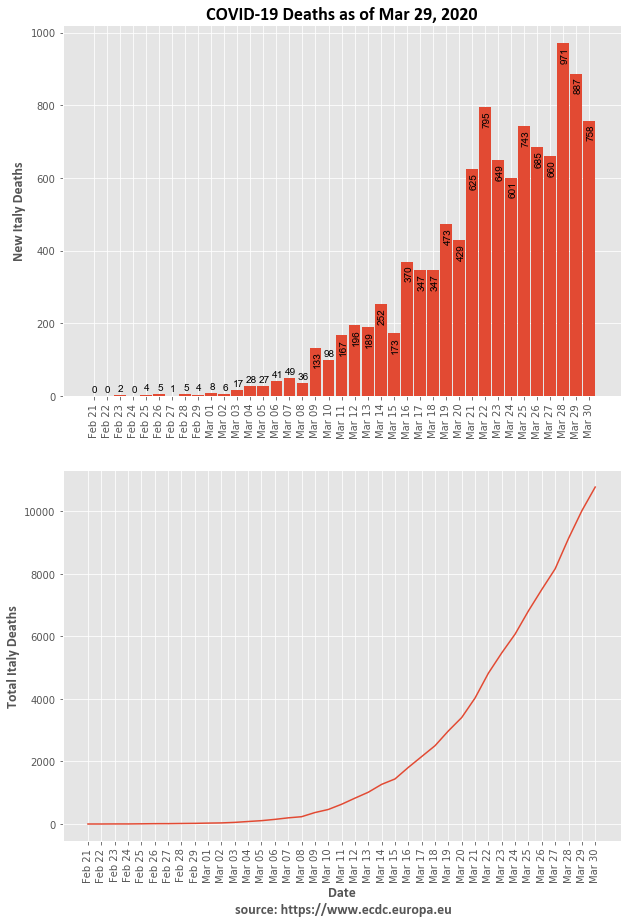

In [23]:
#fig, (axes) = plt.subplots(nrows=2, ncols=1, figsize=(16,20), sharex=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

# function to label bars of bar chart
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height >= 100 and height < 1000:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(2, -20),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial", rotation=90)
        elif height >= 1000:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(2, -30),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial", rotation=90)
        else:
            ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(1, 2),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, fontfamily="arial")

# x-axis is the date, Y axis is the number of cases
rects1=ax1.bar(dfloc.get_group('Italy')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('Italy')["2020-02-21":].new_deaths, width=0.9)
ax1.set_xticklabels(dfloc.get_group('Italy')["2020-02-21":].index.strftime("%b %d"), rotation=90)
autolabel(rects1)

# x-axis is the date, Y axis is the number of cases
ax2.plot(dfloc.get_group('Italy')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('Italy')["2020-02-21":].total_deaths)
ax2.set_xticklabels(dfloc.get_group('Italy')["2020-02-21":].index.strftime("%b %d"), rotation=90)

#set y-limit to match scale of total cases
#ax1.set_ylim((-100,20000))

ax1.set_title('COVID-19 Deaths as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('New Italy Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Total Italy Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://www.ecdc.europa.eu', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.savefig('COVID-2020-03-30_Italy_ecdc.png', bbox_inches='tight', pad_inches=0.2)
plt.show()